# Import packages and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import dataset
dataset=pd.read_csv("C:/Users/coderflo1/Desktop/SouthGermanCredit/dat.csv",low_memory=False)

In [3]:
dataset.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


# Check the dataset for incorrect data types and null values

In [4]:
# Check info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [5]:
# Check for null values
dataset.isnull().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

In [6]:
# check count of credit_risk
dataset['credit_risk'].value_counts()

good    700
bad     300
Name: credit_risk, dtype: int64

# Create cross tabulations and plot the data points in bar charts

In [7]:
# Create list for each type of credit score
dataset_g = dataset['credit_risk'] == 'good'
dataset_b = dataset['credit_risk'] == 'bad'

In [8]:
#Get counts of savings
dataset_sav = dataset['savings']
dataset_sav.value_counts()

unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64

In [9]:
# Create list of savings by credit score
dataset_g_sav = dataset_sav[dataset_g] #good
dataset_b_sav = dataset_sav[dataset_b] #bad

In [10]:
dataset_g_sav

0      unknown/no savings account
1      unknown/no savings account
2                   ... <  100 DM
3      unknown/no savings account
4      unknown/no savings account
                  ...            
746                ... >= 1000 DM
747    unknown/no savings account
748    unknown/no savings account
749    unknown/no savings account
750                 ... <  100 DM
Name: savings, Length: 700, dtype: object

In [11]:
dataset_b_sav

22     unknown/no savings account
45     unknown/no savings account
47                  ... <  100 DM
97     unknown/no savings account
110    unknown/no savings account
                  ...            
995    unknown/no savings account
996    unknown/no savings account
997                ... >= 1000 DM
998                ... >= 1000 DM
999                ... >= 1000 DM
Name: savings, Length: 300, dtype: object

In [12]:
#Get frequency
Freq_g_sav = dataset_g_sav.value_counts()
Freq_b_sav = dataset_b_sav.value_counts()

In [13]:
Freq_g_sav

unknown/no savings account    386
... >= 1000 DM                151
... <  100 DM                  69
100 <= ... <  500 DM           52
500 <= ... < 1000 DM           42
Name: savings, dtype: int64

In [14]:
Freq_b_sav

unknown/no savings account    217
... <  100 DM                  34
... >= 1000 DM                 32
100 <= ... <  500 DM           11
500 <= ... < 1000 DM            6
Name: savings, dtype: int64

In [15]:
# Table: credit_risk by savings
plot_sav = pd.DataFrame({'bad': Freq_b_sav,'good': Freq_g_sav, })
plot_sav.head()

,bad,good
... < 100 DM,34,69
... >= 1000 DM,32,151
100 <= ... < 500 DM,11,52
500 <= ... < 1000 DM,6,42
unknown/no savings account,217,386


In [16]:
#change from count to % table
plot_sav = plot_sav.div(plot_sav.sum(axis=1), axis=0)*100
plot_sav

,bad,good
... < 100 DM,33.009709,66.990291
... >= 1000 DM,17.486339,82.513661
100 <= ... < 500 DM,17.460317,82.539683
500 <= ... < 1000 DM,12.500000,87.500000
unknown/no savings account,35.986733,64.013267


In [17]:
# define row order
plot_sav= plot_sav.reindex(['... >= 1000 DM','500 <= ... < 1000 DM','100 <= ... <  500 DM','... <  100 DM','unknown/no savings account'])

Text(0.5, 0, 'Percentage')

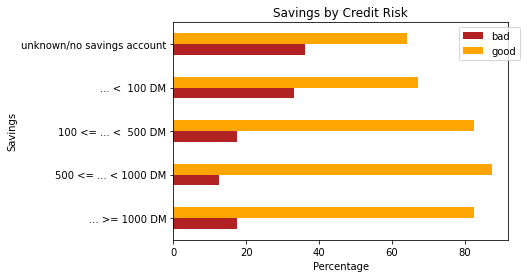

In [18]:
# Horizontal chart by %
plot_sav.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Savings by Credit Risk')
plt.ylabel('Savings')
plt.xlabel('Percentage')

In [19]:
print("start chart code for most valuable property owned----------------------------")

start chart code for most valuable property owned----------------------------


Text(0.5, 0, 'Percentage')

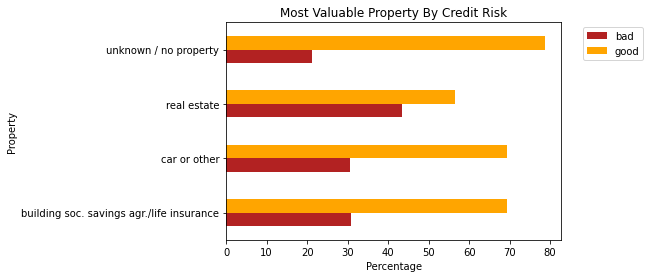

In [20]:
#Get counts of property 
dataset_pro = dataset['property']
#dataset_pro.value_counts()

# Create list of property by credit score
dataset_g_pro_1 = dataset_pro[dataset_g] #good
dataset_b_pro_1 = dataset_pro[dataset_b] #bad

#Get frequency
Freq_g_pro = dataset_g_pro_1.value_counts()
Freq_b_pro = dataset_b_pro_1.value_counts()

# Table: property by credit_risk
plot_pro = pd.DataFrame({'bad': Freq_b_pro,'good': Freq_g_pro})
#plot_pro.head()

#change from count to % table
plot_pro = plot_pro.div(plot_pro.sum(axis=1), axis=0)*100
#plot_pro

# Horizontal chart
plot_pro.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Most Valuable Property By Credit Risk')
plt.ylabel('Property')
plt.xlabel('Percentage')

In [21]:
print("start chart code for job----------------------------")

start chart code for job----------------------------


Text(0.5, 0, 'Percentage')

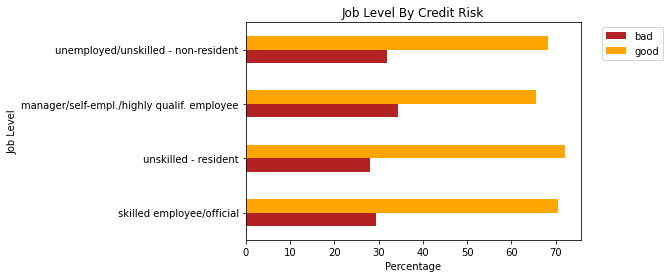

In [22]:
#Get counts of job 
dataset_job = dataset['job']
#dataset_job.value_counts()

# Create list of job by credit score
dataset_g_job_1 = dataset_job[dataset_g] #good
dataset_b_job_1 = dataset_job[dataset_b] #bad

#Get frequency
Freq_g_job = dataset_g_job_1.value_counts()
Freq_b_job = dataset_b_job_1.value_counts()

# Table: job by credit_risk
plot_job = pd.DataFrame({'bad': Freq_b_job,'good': Freq_g_job})
#plot_job.head()

#change from count to % table
plot_job = plot_job.div(plot_job.sum(axis=1), axis=0)*100
#plot_job

# Horizontal chart
plot_job.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Job Level By Credit Risk')
plt.ylabel('Job Level')
plt.xlabel('Percentage')


In [23]:
print("start chart code for number of credits----------------------------")

start chart code for number of credits----------------------------


Text(0.5, 0, 'Percentage')

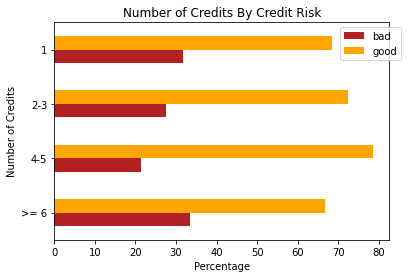

In [24]:
#Get counts
dataset_numcre = dataset['number_credits']
#dataset_numcre.value_counts()

# Create list of number fo credits by credit score
dataset_g_numcre_1 = dataset_numcre[dataset_g] #good
dataset_b_numcre_1 = dataset_numcre[dataset_b] #bad

#Get frequency
Freq_g_numcre = dataset_g_numcre_1.value_counts()
Freq_b_numcre = dataset_b_numcre_1.value_counts()

# Table: 
plot_numcre = pd.DataFrame({'bad': Freq_b_numcre,'good': Freq_g_numcre})
#plot_numcre.head()

#change from count to % table
plot_numcre = plot_numcre.div(plot_numcre.sum(axis=1), axis=0)*100
#plot_numcre

# define row order
plot_numcre= plot_numcre.reindex(['>= 6','4-5','2-3','1'])

# Horizontal chart
plot_numcre.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Number of Credits By Credit Risk')
plt.ylabel('Number of Credits')
plt.xlabel('Percentage')


Text(0.5, 0, 'Percentage')

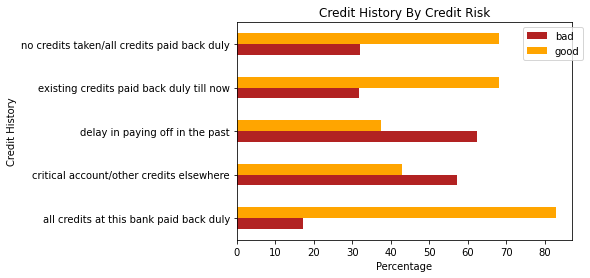

In [25]:
#Get counts
dataset_crehis = dataset['credit_history']
#dataset_crehis.value_counts()

# Create list of credit_history by credit score
dataset_g_crehis_1 = dataset_crehis[dataset_g] #good
dataset_b_crehis_1 = dataset_crehis[dataset_b] #bad

#Get frequency
Freq_g_crehis = dataset_g_crehis_1.value_counts()
Freq_b_crehis = dataset_b_crehis_1.value_counts()

# Table: 
plot_crehis = pd.DataFrame({'bad': Freq_b_crehis,'good': Freq_g_crehis})
#plot_crehis.head()

#change from count to % table
plot_crehis = plot_crehis.div(plot_crehis.sum(axis=1), axis=0)*100
#plot_crehis

# Horizontal chart
plot_crehis.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Credit History By Credit Risk')
plt.ylabel('Credit History')
plt.xlabel('Percentage')

In [26]:
print("start chart code for personal_status_sex----------------------------")

start chart code for personal_status_sex----------------------------


Text(0.5, 0, 'Percentage')

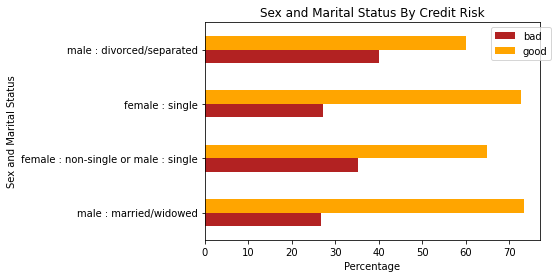

In [27]:
#Get counts
dataset_sex= dataset['personal_status_sex']
#dataset_sex.value_counts()

# Create list of personal status/ sex by credit score
dataset_g_sex_1 = dataset_sex[dataset_g] #good
dataset_b_sex_1 = dataset_sex[dataset_b] #bad

#Get frequency
Freq_g_sex = dataset_g_sex_1.value_counts()
Freq_b_sex = dataset_b_sex_1.value_counts()

# Table: 
plot_sex = pd.DataFrame({'bad': Freq_b_sex,'good': Freq_g_sex})
#plot_sex.head()

#change from count to % table
plot_sex = plot_sex.div(plot_sex.sum(axis=1), axis=0)*100
#plot_sex

# Horizontal chart
plot_sex.plot(kind="barh", color=['firebrick', 'orange'],stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Sex and Marital Status By Credit Risk')
plt.ylabel('Sex and Marital Status')
plt.xlabel('Percentage')

In [28]:
print("start chart code for housing----------------------------")

start chart code for housing----------------------------


Text(0.5, 0, 'Percentage')

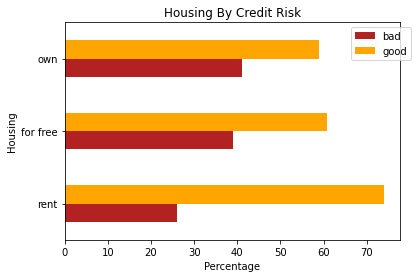

In [29]:
#Get counts
dataset_hou= dataset['housing']
#dataset_hou.value_counts()

# Create list of housing by credit score
dataset_g_hou_1 = dataset_hou[dataset_g] #good
dataset_b_hou_1 = dataset_hou[dataset_b] #bad

#Get frequency
Freq_g_hou = dataset_g_hou_1.value_counts()
Freq_b_hou = dataset_b_hou_1.value_counts()

# Table: 
plot_hou = pd.DataFrame({'bad': Freq_b_hou,'good': Freq_g_hou})
#plot_hou.head()

#change from count to % table
plot_hou = plot_hou.div(plot_hou.sum(axis=1), axis=0)*100
#plot_hou

# Horizontal chart
plot_hou.plot(kind="barh", color=['firebrick', 'orange'],stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Housing By Credit Risk')
plt.ylabel('Housing')
plt.xlabel('Percentage')

In [30]:
print("start chart code for people_liable----------------------------")

start chart code for people_liable----------------------------


Text(0.5, 0, 'Percentage')

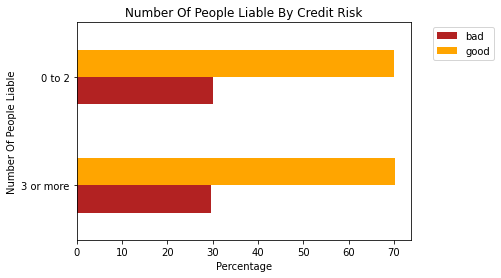

In [31]:
#Get counts
dataset_peo= dataset['people_liable']
#dataset_peo.value_counts()

# Create list of people_liable by credit score
dataset_g_peo_1 = dataset_peo[dataset_g] #good
dataset_b_peo_1 = dataset_peo[dataset_b] #bad

#Get frequency
Freq_g_peo = dataset_g_peo_1.value_counts()
Freq_b_peo = dataset_b_peo_1.value_counts()

# Table: 
plot_peo = pd.DataFrame({'bad': Freq_b_peo,'good': Freq_g_peo})
#plot_peo.head()

#change from count to % table
plot_peo = plot_peo.div(plot_peo.sum(axis=1), axis=0)*100
#plot_peo

# define row order
plot_peo= plot_peo.reindex(['3 or more','0 to 2'])

# Horizontal chart
plot_peo.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Number Of People Liable By Credit Risk')
plt.ylabel('Number Of People Liable')
plt.xlabel('Percentage')


In [32]:
print("start chart code for other_installment_plans----------------------------")

start chart code for other_installment_plans----------------------------


Text(0.5, 0, 'Percentage')

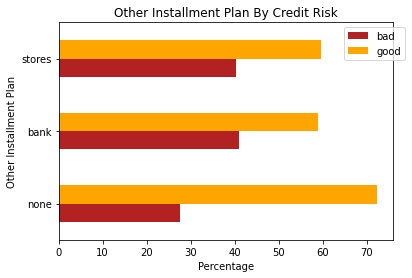

In [33]:
#Get counts
dataset_otherint= dataset['other_installment_plans']
#dataset_otherint.value_counts()

# Create list of other_installment_plans by credit score
dataset_g_otherint_1 = dataset_otherint[dataset_g] #good
dataset_b_otherint_1 = dataset_otherint[dataset_b] #bad

#Get frequency
Freq_g_otherint = dataset_g_otherint_1.value_counts()
Freq_b_otherint = dataset_b_otherint_1.value_counts()

# Table: 
plot_otherint = pd.DataFrame({'bad': Freq_b_otherint,'good': Freq_g_otherint})
#plot_otherint.head()

#change from count to % table
plot_otherint = plot_otherint.div(plot_otherint.sum(axis=1), axis=0)*100
#plot_otherint

# Horizontal chart
plot_otherint.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Other Installment Plan By Credit Risk')
plt.ylabel('Other Installment Plan')
plt.xlabel('Percentage')

In [34]:
print("start chart code for employment_duration----------------------------")

start chart code for employment_duration----------------------------


Text(0.5, 0, 'Percentage')

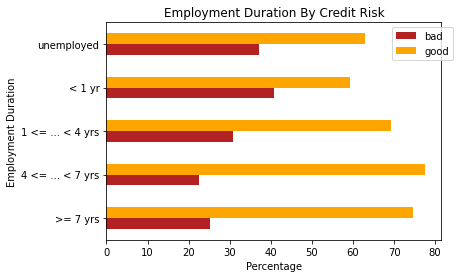

In [35]:
#Get counts
dataset_employ= dataset['employment_duration']
dataset_employ.value_counts()

# Create list of employment_duration by credit score
dataset_g_employ_1 = dataset_employ[dataset_g] #good
dataset_b_employ_1 = dataset_employ[dataset_b] #bad

#Get frequency
Freq_g_employ = dataset_g_employ_1.value_counts()
Freq_b_employ = dataset_b_employ_1.value_counts()

# Table: 
plot_employ = pd.DataFrame({'bad': Freq_b_employ,'good': Freq_g_employ})
plot_employ.head()

#change from count to % table
plot_employ = plot_employ.div(plot_employ.sum(axis=1), axis=0)*100
plot_employ

# define row order
plot_employ=plot_employ.reindex(['>= 7 yrs','4 <= ... < 7 yrs','1 <= ... < 4 yrs','< 1 yr','unemployed'])

# Horizontal chart
plot_employ.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Employment Duration By Credit Risk')
plt.ylabel('Employment Duration')
plt.xlabel('Percentage')

In [36]:
print("start chart code for purpose----------------------------")

start chart code for purpose----------------------------


Text(0.5, 0, 'Percentage')

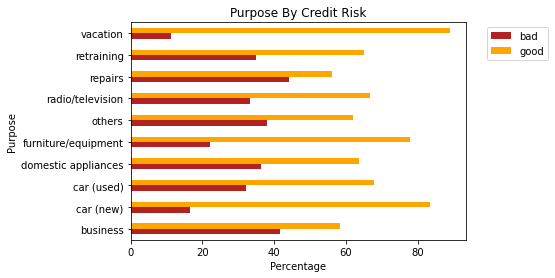

In [37]:
#Get counts
dataset_purpose= dataset['purpose']
#dataset_purpose.value_counts()

# Create list of purpose by credit score
dataset_g_purpose_1 = dataset_purpose[dataset_g] #good
dataset_b_purpose_1 = dataset_purpose[dataset_b] #bad

#Get frequency
Freq_g_purpose = dataset_g_purpose_1.value_counts()
Freq_b_purpose = dataset_b_purpose_1.value_counts()

# Table: 
plot_purpose = pd.DataFrame({'bad': Freq_b_purpose,'good': Freq_g_purpose})
#plot_purpose.head()

#change from count to % table
plot_purpose = plot_purpose.div(plot_purpose.sum(axis=1), axis=0)*100
#plot_purpose

# Horizontal chart
plot_purpose.plot(kind="barh", color=['firebrick', 'orange'],stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Purpose By Credit Risk')
plt.ylabel('Purpose')
plt.xlabel('Percentage')

In [38]:
print("start chart code for status----------------------------")

start chart code for status----------------------------


Text(0.5, 0, 'Percentage')

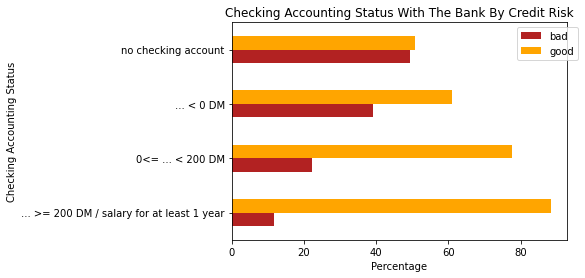

In [39]:
#Get counts
dataset_status= dataset['status']
#dataset_status.value_counts()

# Create list of status by credit score
dataset_g_status_1 = dataset_status[dataset_g] #good
dataset_b_status_1 = dataset_status[dataset_b] #bad

#Get frequency
Freq_g_status = dataset_g_status_1.value_counts()
Freq_b_status = dataset_b_status_1.value_counts()

# Table: 
plot_status = pd.DataFrame({'bad': Freq_b_status,'good': Freq_g_status})
#plot_status.head()

#change from count to % table
plot_status = plot_status.div(plot_status.sum(axis=1), axis=0)*100
#plot_status

# define row order
plot_status= plot_status.reindex(['... >= 200 DM / salary for at least 1 year','0<= ... < 200 DM','... < 0 DM','no checking account'])

# Horizontal chart
plot_status.plot(kind="barh",color=['firebrick', 'orange'], stacked=False)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Checking Accounting Status With The Bank By Credit Risk')
plt.ylabel('Checking Accounting Status')
plt.xlabel('Percentage')

# Create box plots for subgroup comparisons

Text(0.5, 1.0, 'Credit Amount By Purpose')

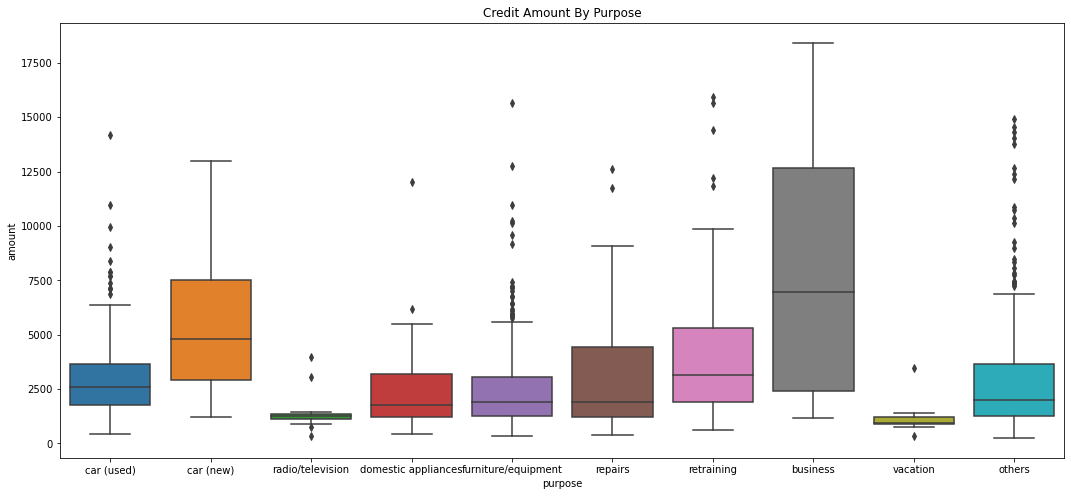

In [40]:
# box plot for amount by purpose
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='purpose',y='amount',order=['car (used)','car (new)','radio/television','domestic appliances','furniture/equipment','repairs','retraining','business','vacation','others'],ax=ax,data=dataset).set_title('Credit Amount By Purpose')


Text(0.5, 1.0, 'Credit Amount By Purpose')

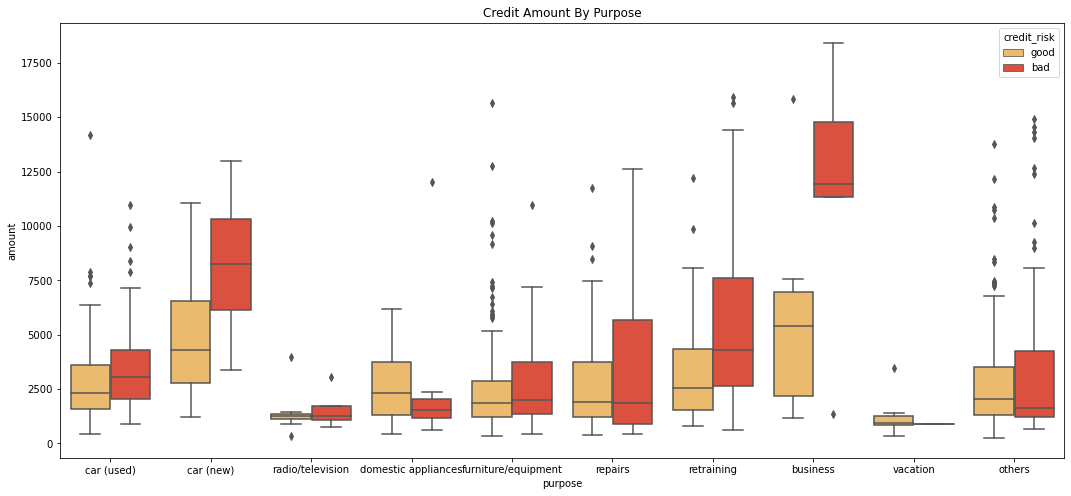

In [41]:
# box plot for amount by purpose (separated by credit risk)
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='purpose',y='amount',hue='credit_risk',palette='YlOrRd',order=['car (used)','car (new)','radio/television','domestic appliances','furniture/equipment','repairs','retraining','business','vacation','others'],ax=ax,data=dataset).set_title('Credit Amount By Purpose')

Text(0.5, 1.0, 'Age By Credit Purpose')

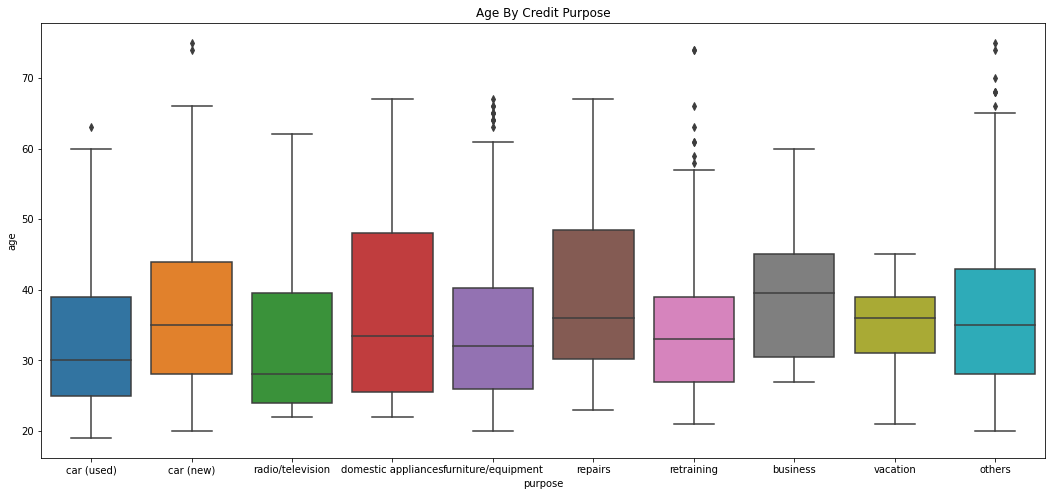

In [42]:
# box plot for age by purpose
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='purpose',y='age',order=['car (used)','car (new)','radio/television','domestic appliances','furniture/equipment','repairs','retraining','business','vacation','others'],ax=ax,data=dataset).set_title('Age By Credit Purpose')

Text(0.5, 1.0, 'Age By Credit Purpose')

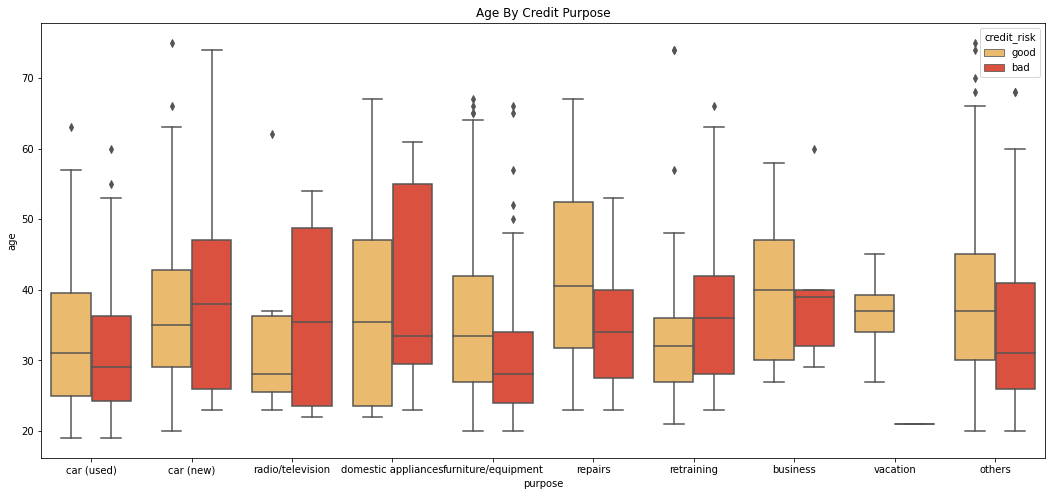

In [43]:
# box plot for age by purpose (separated by credit risk)
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='purpose',y='age',hue='credit_risk',palette='YlOrRd',order=['car (used)','car (new)','radio/television','domestic appliances','furniture/equipment','repairs','retraining','business','vacation','others'],ax=ax,data=dataset).set_title('Age By Credit Purpose')

Text(0.5, 1.0, 'Credit Amount By Installment Rate')

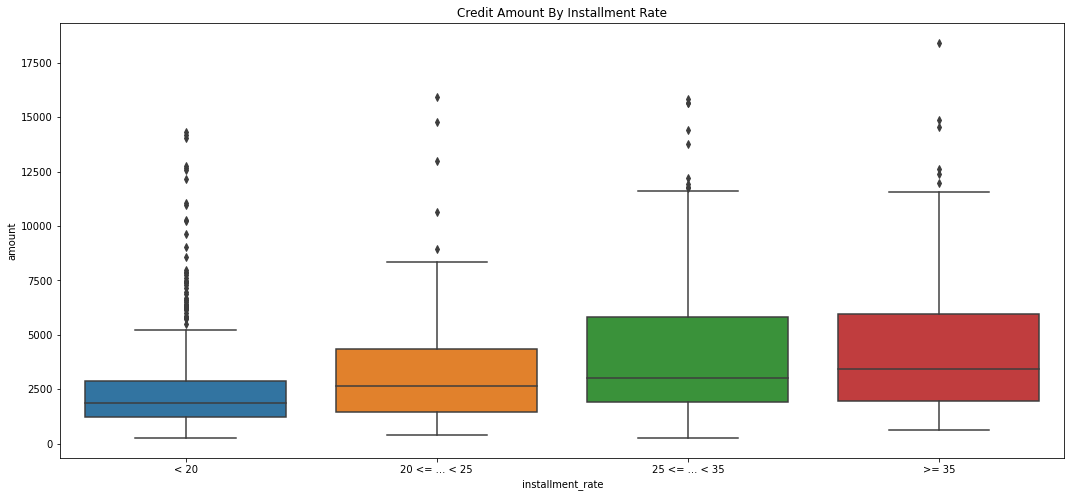

In [44]:
# box plot for amount by installment_rate
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='installment_rate',y='amount',order=['< 20','20 <= ... < 25','25 <= ... < 35','>= 35'],ax=ax,data=dataset).set_title('Credit Amount By Installment Rate')

Text(0.5, 1.0, 'Credit Amount By Installment Rate')

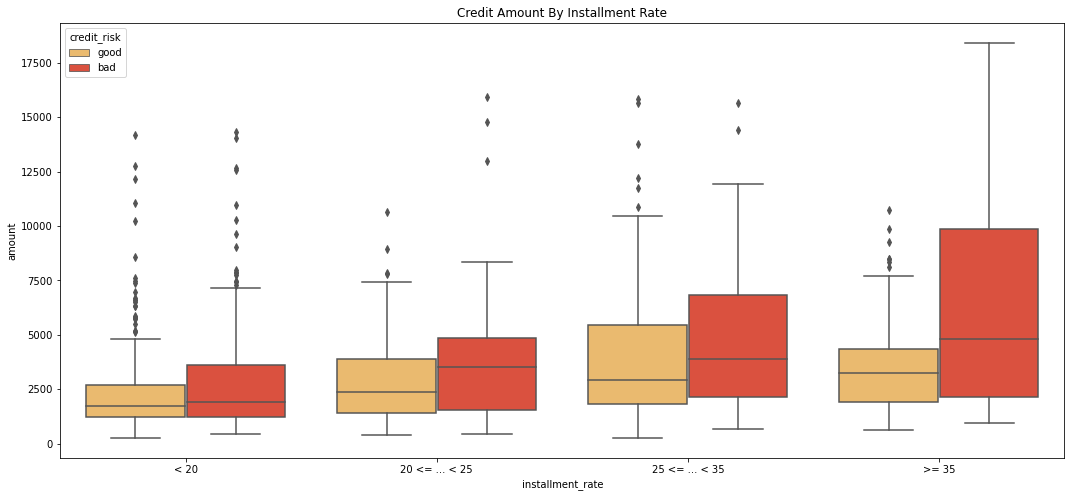

In [45]:
# box plot for amount by installment_rate
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='installment_rate',y='amount',hue='credit_risk',palette='YlOrRd',order=['< 20','20 <= ... < 25','25 <= ... < 35','>= 35'],ax=ax,data=dataset).set_title('Credit Amount By Installment Rate')

Text(0.5, 1.0, 'Credit Duration (in months) By Credit Purpose')

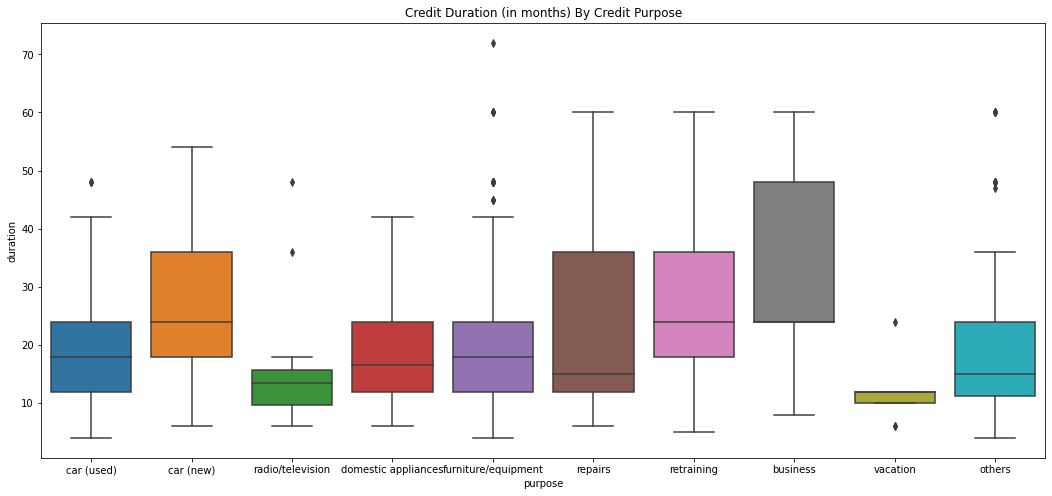

In [46]:
# box plot for credit duration by purpose
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='purpose',y='duration',order=['car (used)','car (new)','radio/television','domestic appliances','furniture/equipment','repairs','retraining','business','vacation','others'],ax=ax,data=dataset).set_title('Credit Duration (in months) By Credit Purpose')

Text(0.5, 1.0, 'Credit Duration (in months) By Credit Purpose')

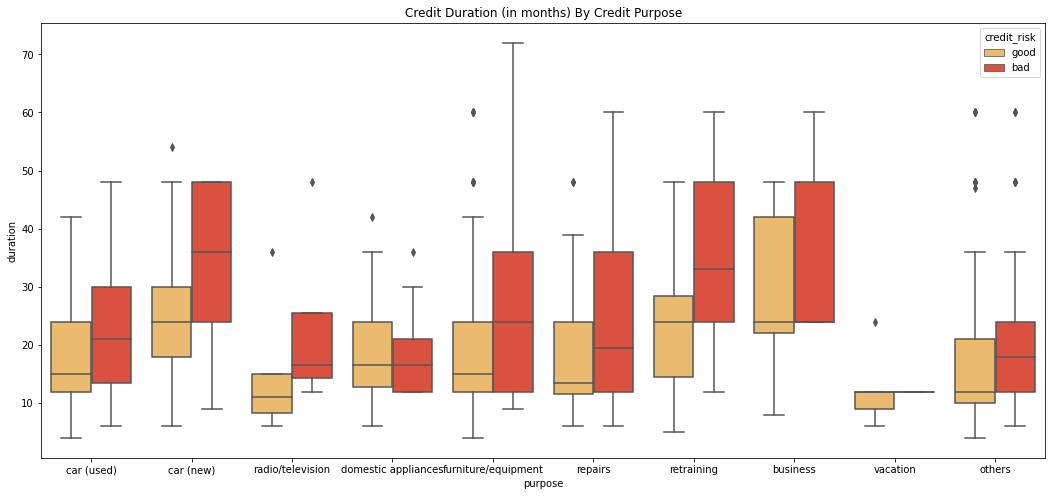

In [47]:
# box plot for credit duration by purpose (separated by credit risk)
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='purpose',y='duration',hue='credit_risk',palette='YlOrRd',order=['car (used)','car (new)','radio/television','domestic appliances','furniture/equipment','repairs','retraining','business','vacation','others'],ax=ax,data=dataset).set_title('Credit Duration (in months) By Credit Purpose')

Text(0.5, 1.0, 'Age By Credit Risk')

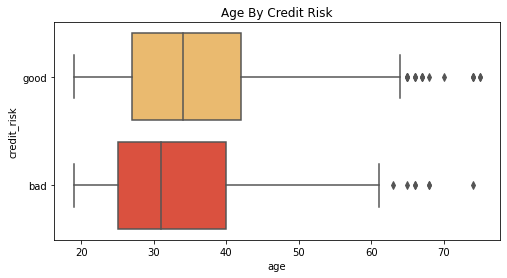

In [48]:
# box plot for Age by credit risk
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y='credit_risk',x='age',palette='YlOrRd',ax=ax,data=dataset).set_title('Age By Credit Risk')

Text(0.5, 1.0, 'Credit Duration (in months) By Credit Risk')

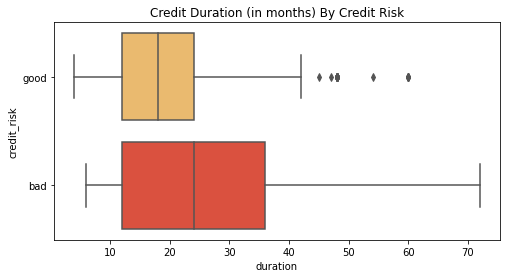

In [49]:
# box plot for duration by credit risk
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y='credit_risk',x='duration',palette='YlOrRd',ax=ax,data=dataset).set_title('Credit Duration (in months) By Credit Risk')

Text(0.5, 1.0, 'Credit Amount By Credit Risk')

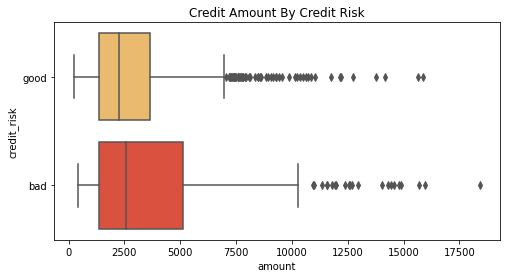

In [50]:
# box plot for credit amount by credit risk
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y='credit_risk',x='amount',palette='YlOrRd',ax=ax,data=dataset).set_title('Credit Amount By Credit Risk')